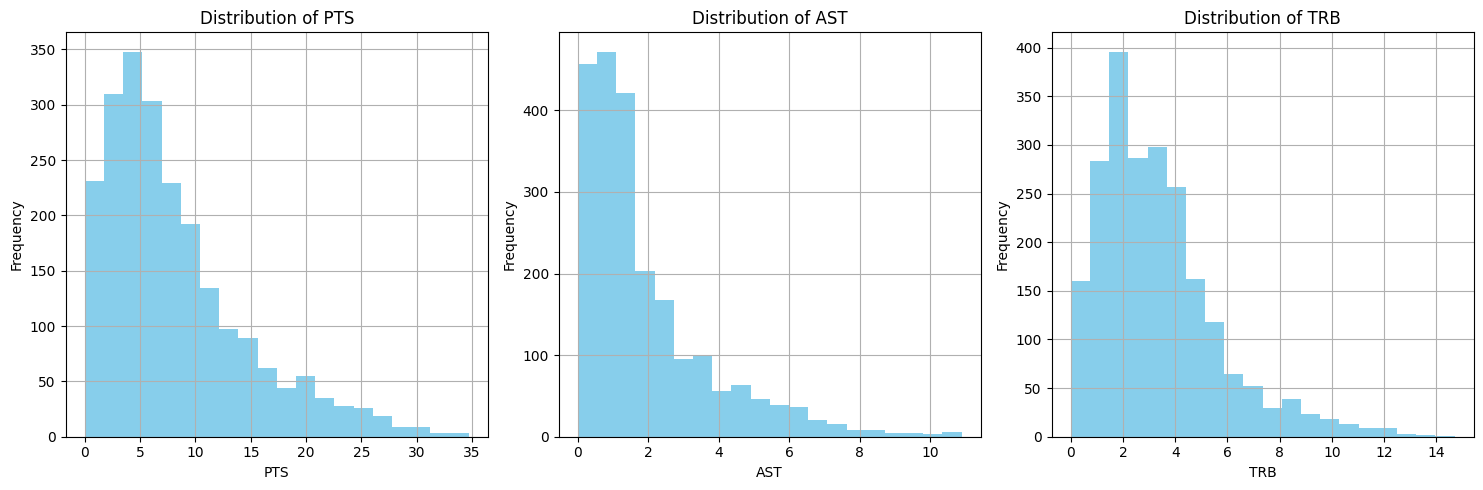

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
nba_data = pd.read_csv("../data/NBA_Regular_Season_Stats_2021-2024.csv")

# Define the key stats to analyze
key_stats = ['pts', 'ast', 'trb']

# Create a figure for plotting
plt.figure(figsize=(15, 5))

# Plot histograms for each key stat
for i, stat in enumerate(key_stats):
    plt.subplot(1, 3, i+1)
    nba_data[stat].hist(bins=20, color='skyblue')
    plt.title(f'Distribution of {stat.upper()}')
    plt.xlabel(stat.upper())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

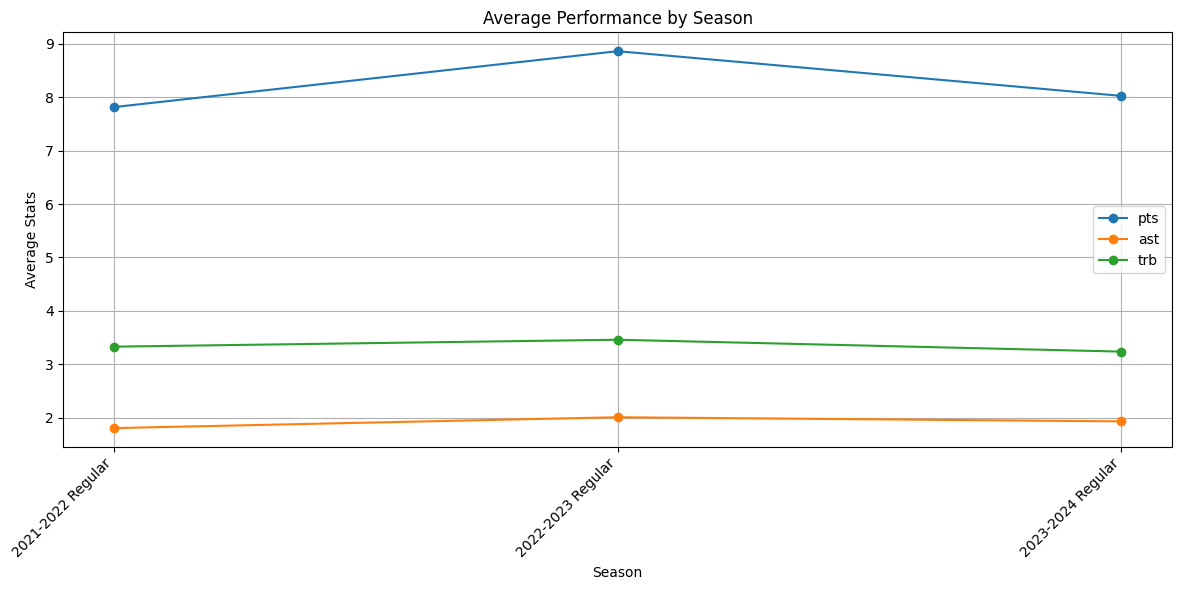

In [8]:
# Create a custom order for the seasons
season_order = ['2021-2022 Regular', '2022-2023 Regular', '2023-2024 Regular',]

# Create a season-specific DataFrame
season_stats = nba_data.groupby('season')[key_stats].mean().reindex(season_order)

# Plot the trends of key stats across seasons
plt.figure(figsize=(12, 6))
for stat in key_stats:
    plt.plot(season_stats.index, season_stats[stat], marker='o', label=stat)

plt.title('Average Performance by Season')
plt.xlabel('Season')
plt.ylabel('Average Stats')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

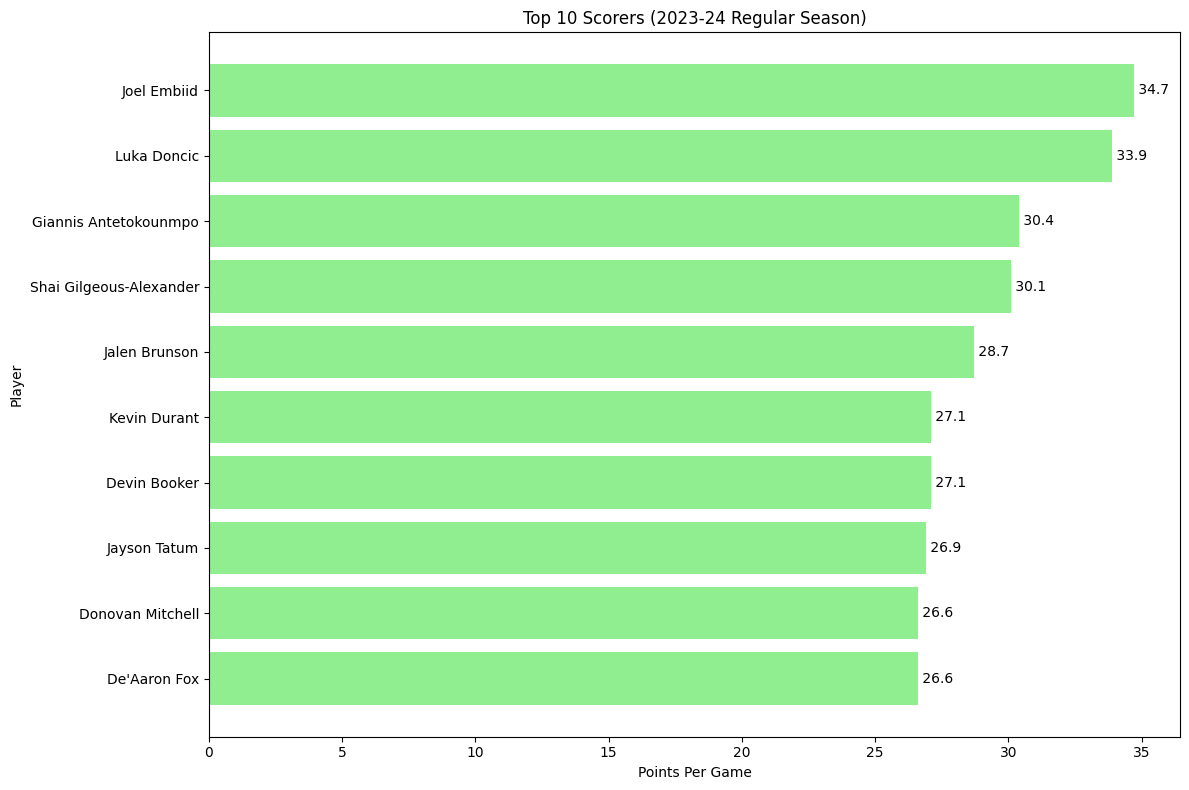

                       player   pts
1839              Joel Embiid  34.7
1948              Luka Doncic  33.9
1721    Giannis Antetokounmpo  30.4
2124  Shai Gilgeous-Alexander  30.1
1784            Jalen Brunson  28.7
1906             Kevin Durant  27.1
1672             Devin Booker  27.1
1823             Jayson Tatum  26.9
1680         Donovan Mitchell  26.6
1649             De'Aaron Fox  26.6


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming nba_data is your original DataFrame
# Make sure the 'season' column contains the exact string '2023-2024'
# and that 'pts' column exists and contains numeric data

# Find top 10 players by points for the 2023-2024 season
top_scorers = nba_data[nba_data['season'] == '2023-2024 Regular'].sort_values(by='pts', ascending=False).head(10)

# Check if we have data
if top_scorers.empty:
    print("No data found for the 2023-2024 season. Please check your data.")
else:
    # Plot the top scorers
    plt.figure(figsize=(12, 8))
    plt.barh(top_scorers['player'], top_scorers['pts'], color='lightgreen')
    plt.title('Top 10 Scorers (2023-24 Regular Season)')
    plt.xlabel('Points Per Game')
    plt.ylabel('Player')
    plt.gca().invert_yaxis()  # Invert y-axis to show highest scorer at the top
    
    # Add value labels to the end of each bar
    for i, v in enumerate(top_scorers['pts']):
        plt.text(v, i, f' {v:.1f}', va='center')
    
    plt.tight_layout()
    plt.show()

# Print the data for verification
print(top_scorers[['player', 'pts']])

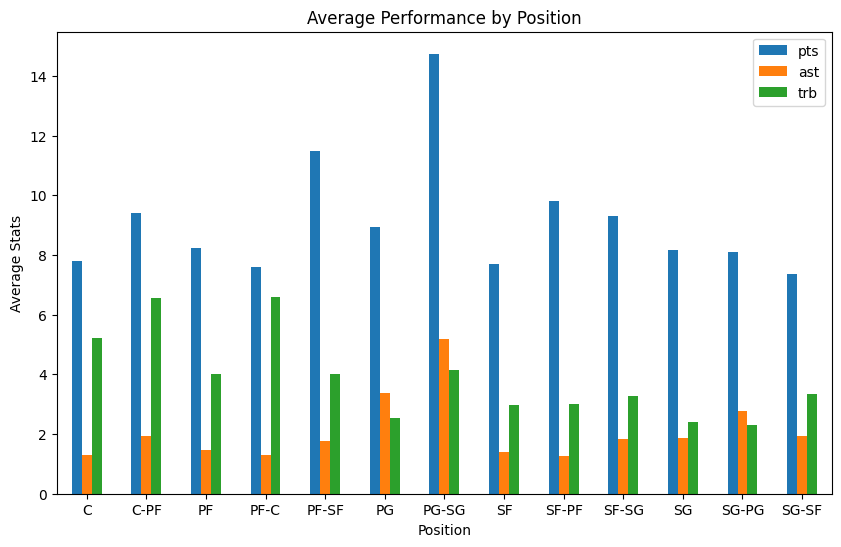

In [10]:
# Group by player position and calculate mean stats
positional_stats = nba_data.groupby('pos')[key_stats].mean()

# Plot positional performance for key stats
positional_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Average Performance by Position')
plt.xlabel('Position')
plt.ylabel('Average Stats')
plt.xticks(rotation=0)
plt.show()